<h1> Лабораторна робота №5 </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [3]:
data = pd.read_csv('athlete_events.csv')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
new_data = ["Ukraine","China"]
br20 = 0; f20br25 = 0; f25br30 = 0; f30br40 = 0; sp20 = 0; f20sp25 = 0; f25sp30 = 0; f30sp40 = 0
n = data.shape[0]

for i in range(n):
        if "Ukraine" in data["Team"][i]:
            if (data['Age'][i] <= 20):
                br20 += 1
            elif ((data['Age'][i] > 20) & (data['Age'][i] <= 25)):
                f20br25 += 1
            elif ((data['Age'][i] > 25) & (data['Age'][i] <= 30)):
                f25br30 += 1
            elif ((data['Age'][i] > 30) & (data['Age'][i] <= 40)):
                f30br40 += 1
            
                
            
        elif ("China" in data["Team"][i]):
            if (data['Age'][i] <= 20):
                sp20 += 1
            elif ((data['Age'][i] > 20) & (data['Age'][i] <= 25)):
                f20sp25 += 1
            elif ((data['Age'][i] > 25) & (data['Age'][i] <= 30)):
                f25sp30 += 1
            elif ((data['Age'][i] > 30) & (data['Age'][i] <= 40)):
                f30sp40 += 1
            
                
            
table = pd.DataFrame(columns = new_data)
table = pd.DataFrame({"Ukraine": pd.Series([br20, f20br25, f25br30, f30br40], index = ["Less than 20", "Between 20 and 25","Beetween 25 and 30", "Beetween 30 and 40"]),
                     "China": pd.Series([sp20, f20sp25, f25sp30, f30sp40], index = ["Less than 20", "Between 20 and 25","Beetween 25 and 30", "Beetween 30 and 40"])})
ntable = copy.deepcopy(table)
table

,Ukraine,China
Less than 20,453,1392
Between 20 and 25,1033,2428
Beetween 25 and 30,733,1106
Beetween 30 and 40,323,184


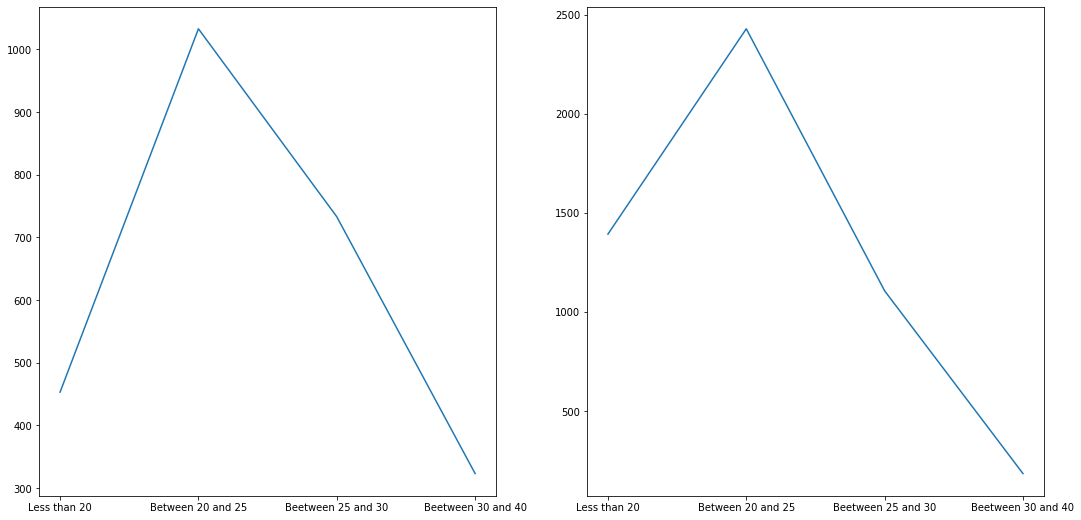

In [7]:
fig = plt.subplots(1,2,figsize = (18,9))

plt.subplot(1, 2, 1)
plt.plot(table.index, table['Ukraine'])

plt.subplot(1, 2, 2)
plt.plot(table.index, table['China'])

In [11]:
def pirson(new_data, significant_level):
    n = new_data.shape[0]
    if(sum(new_data["Ukraine"]) != sum(new_data["China"])):
        new_data["Ukraine"] = [new_data["Ukraine"][i] * 100 / sum(new_data["Ukraine"]) for i in range(n)]
        new_data["China"] = [new_data["China"][i] * 100 / sum(new_data["China"]) for i in range(n)]
    else:
        new_data['ni-ni^2'] = [(new_data["Ukraine"][i] - new_data["China"][i])**2 for i in range(n)]
        new_data["(ni-ni)^2/ni^2"] = [(new_data['ni-ni^2'][i] / new_data["China"][i]) for i in range(n)]
        xi = sum(new_data["(ni-ni)^2/ni^2"])
        
        print("Хі квадрат за даними: ", xi)
        print("Число ступенів свободи: ", n-1)
        a = pd.read_excel("tablePirson.xlsx").iloc[n-1, 1 if(significant_level ==  0.01) else 2]
        print("X^2 критичне: ", a)
        
        if(xi > a):
            print("Розбіжність між розподіленнями статистично значима на даному рівні значимості")
        else:
            print("Розбіжність між розподіленнями відсутня або не суттєва на даному рівні значимості")

In [12]:
pirson(table, 0.01)

Хі квадрат за даними:  29.669479068007572
Число ступенів свободи:  3
X^2 критичне:  11.3
Розбіжність між розподіленнями статистично значима на даному рівні значимості


In [13]:

pirson(table, 0.05)

Хі квадрат за даними:  29.669479068007572
Число ступенів свободи:  3
X^2 критичне:  7.8
Розбіжність між розподіленнями статистично значима на даному рівні значимості


In [14]:
ntable.insert(1, "Ukraine %", table["Ukraine"])
ntable.insert(3, "China %", table["China"])
ntable

,Ukraine,Ukraine %,China,China %
Less than 20,453,17.820614,1392,27.240705
Between 20 and 25,1033,40.637293,2428,47.514677
Beetween 25 and 30,733,28.835563,1106,21.643836
Beetween 30 and 40,323,12.706530,184,3.600783
